In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
data = pd.read_csv('homework_data.csv')
result_df.head(3)

,ДЗ в базе,всего ДЗ,сдали ДЗ,% сдачи ДЗ,средний результат в %,оценили ДЗ,рейтинг ДЗ,% оценивших,light всего ДЗ,light начали ДЗ,...,standard сдали ДЗ,standard % сдачи,standard ср. результат,hard всего ДЗ,hard начали ДЗ,hard сдали ДЗ,hard % сдачи,hard ср. результат,ср. время решения,80 процентиль времени решения ДЗ
0,Алгоритмы сортировки. Решение №1. Легкое,46,8.0,"17,4%","62,5%",NaN,NaN,NaN,45.0,8.0,...,1.0,"100,00%","50,00%",NaN,NaN,NaN,NaN,NaN,18:27:26,0:50:38
1,Алгоритмы сортировки. Решение №1. Среднее,423,162.0,"38,3%","66,0%",51.0,4.823529,"31,48%",1.0,1.0,...,156.0,"37,41%","65,81%",5.0,5.0,5.0,"100,00%","76,67%",5:15:12,2:32:33
2,Алгоритмы сортировки. Решение №1. Тяжелое,383,221.0,"57,7%","65,3%",78.0,4.756410,"35,29%",1.0,1.0,...,NaN,NaN,NaN,382.0,231.0,220.0,"57,59%","65,51%",14:45:28,10:23:24


In [57]:
def convert_to_numeric(value):
    try:
        return pd.to_numeric(value.replace(',', '.').replace('%', ''), errors='coerce')
    except ValueError:
        return None

data = data.dropna(subset=['% сдачи ДЗ', 'средний результат в %', '80 процентиль времени решения ДЗ'])

data['80 процентиль времени решения ДЗ'] = pd.to_timedelta(data['80 процентиль времени решения ДЗ']).dt.total_seconds() / 60
data = data.rename(columns={'80 процентиль времени решения ДЗ': '80 процентиль времени решения ДЗ в минутах'})

data['% сдачи ДЗ'] = data['% сдачи ДЗ'].apply(convert_to_numeric)
data['средний результат в %'] = data['средний результат в %'].apply(convert_to_numeric)

In [15]:
filtered_data = data.copy()[['ДЗ в базе', '80 процентиль времени решения ДЗ в минутах', '% сдачи ДЗ', 'средний результат в %']]

filtered_data['ДЗ в базе'] = filtered_data['ДЗ в базе'].str.replace(r'\s*(?:Легкое|Среднее|Тяжелое)\s*', '', regex=True)

weighted_avg = lambda x: np.average(x, weights=df.loc[x.index, '% сдачи ДЗ'])

groupby_traсk = filtered_data.groupby('ДЗ в базе').agg({
    '% сдачи ДЗ': 'mean',
    '80 процентиль времени решения ДЗ в минутах': weighted_avg,
    'средний результат в %': weighted_avg
}).reset_index()

groupby_traсk.head(5)

,ДЗ в базе,% сдачи ДЗ,80 процентиль времени решения ДЗ в минутах,средний результат в %
0,Автоматизация процессов. Решение №11.,50.100000,3059.913140,45.578177
1,Алгоритмы и структуры данных в C++.,62.500000,2409.336667,73.945120
2,Алгоритмы поиска. Решение №2.,27.900000,2165.005556,52.906571
3,Алгоритмы сортировки. Решение №1.,37.800000,376.489109,65.106790
4,Анализ алгоритмов. Решение №7.,53.833333,141.340640,75.706502


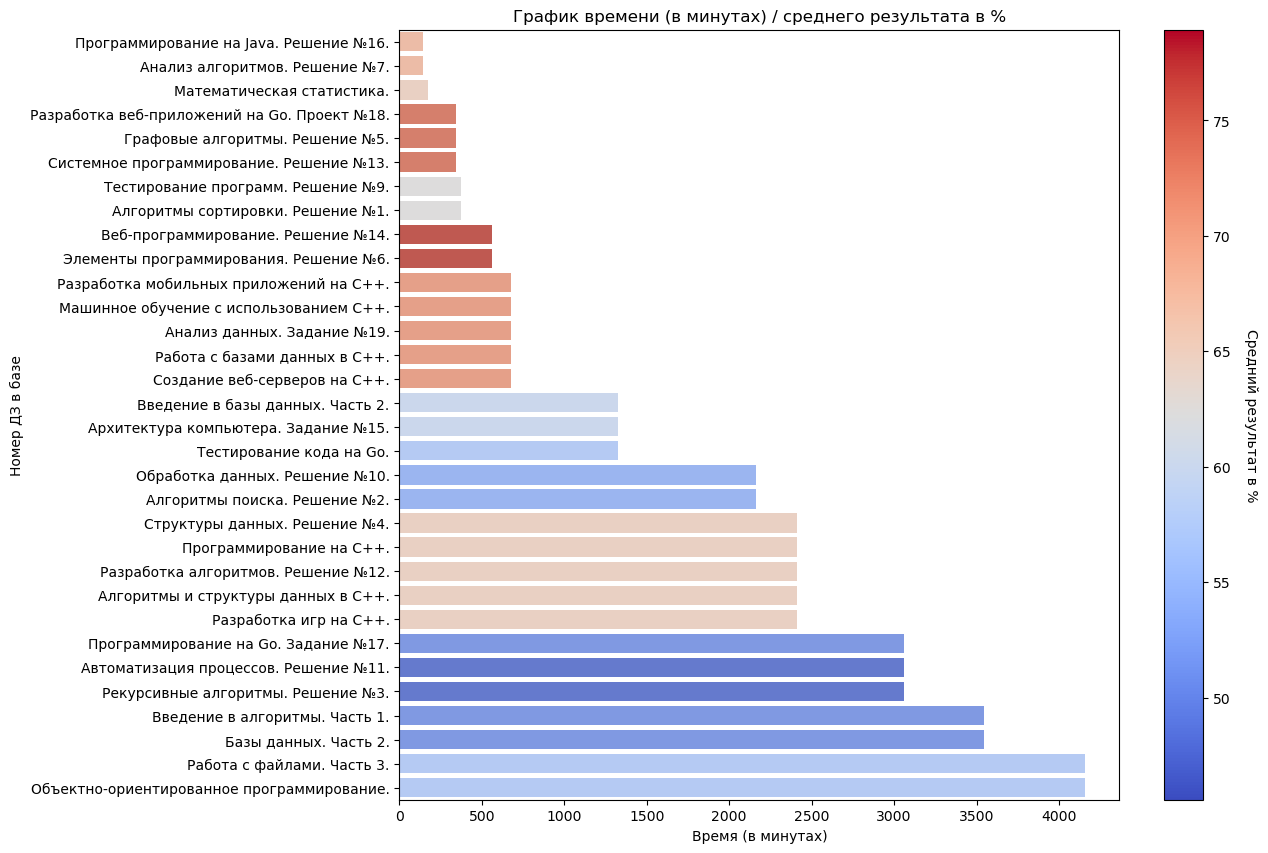

In [65]:
groupby_traсk_copy = groupby_traсk.copy()
groupby_traсk_copy['80 процентиль времени решения ДЗ в минутах'] = groupby_traсk_copy['80 процентиль времени решения ДЗ в минутах'].apply(lambda x: min(x, 5000))
groupby_traсk_copy = groupby_traсk_copy.sort_values(by='80 процентиль времени решения ДЗ в минутах')
groupby_traсk_copy = groupby_traсk_copy[groupby_traсk_copy['ДЗ в базе'].str.contains('')]

def convert_to_numeric(value):
    try:
        return pd.to_numeric(value.replace(',', '.').replace('%', ''), errors='coerce')
    except ValueError:
        return None

plt.figure(figsize=(18, 10))
plt.subplots_adjust(left=0.4)

norm = plt.Normalize(groupby_traсk_copy['средний результат в %'].min(), groupby_traсk_copy['средний результат в %'].max())
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
    
ax = sns.barplot(x='80 процентиль времени решения ДЗ в минутах', y='ДЗ в базе', data=groupby_traсk_copy, palette='coolwarm', hue='средний результат в %', dodge=False)

unique_legend_values = groupby_traсk_copy['средний результат в %'].dropna().unique().astype(int)

legend = plt.legend(title='Средний результат в %')
legend_labels = [f'{value}%' for value in unique_legend_values if value.is_integer()]
legend.get_title().set_fontsize('10') 
for text in legend.texts:
    text.set_fontsize('8') 
    
plt.title('График времени (в минутах) / среднего результата в %')
plt.xlabel('Время (в минутах)')
plt.ylabel('Номер ДЗ в базе')

ax.legend().set_visible(False)
cbar = ax.figure.colorbar(sm, ax=ax)
cbar.set_label('Средний результат в %', rotation=270, labelpad=20)

# plt.savefig('output_plot.png', dpi=300, bbox_inches='tight')

plt.show()

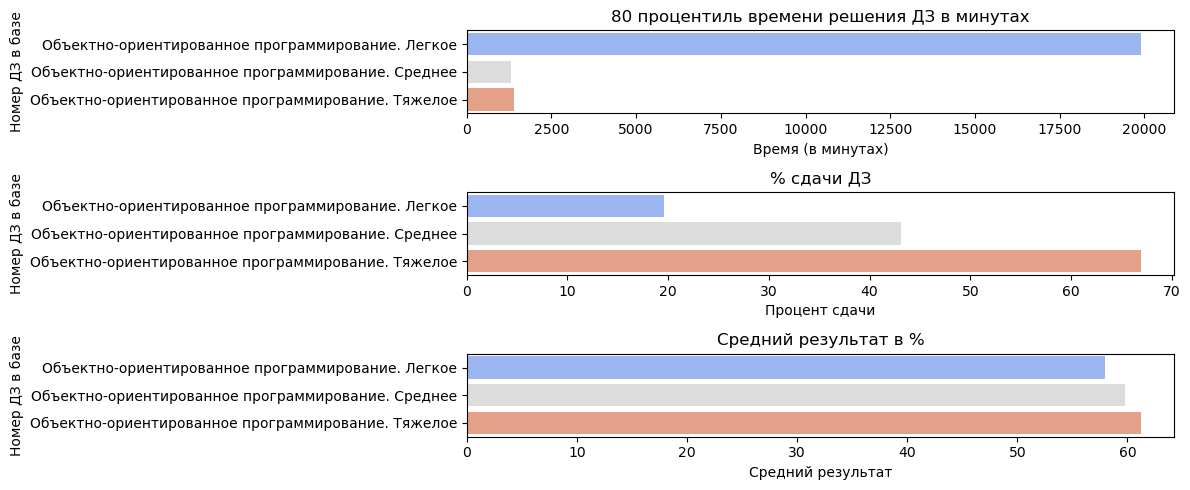

In [69]:
data_sort_copy = data_sort.copy()

data_sort_copy = data_sort_copy[data_sort_copy['ДЗ в базе'].str.contains('Объектно-')]

fig, axes = plt.subplots(nrows=3, figsize=(12, 5))

sns.barplot(x='80 процентиль времени решения ДЗ в минутах', y='ДЗ в базе', hue='средний результат в %', data=data_sort_copy, palette='coolwarm', dodge=False, ax=axes[0])
axes[0].set_title('80 процентиль времени решения ДЗ в минутах')
axes[0].set_xlabel('Время (в минутах)')
axes[0].set_ylabel('Номер ДЗ в базе')
axes[0].legend().set_visible(False)

sns.barplot(x='% сдачи ДЗ', y='ДЗ в базе', palette='coolwarm', hue='средний результат в %', data=data_sort_copy, dodge=False, ax=axes[1])
axes[1].set_title('% сдачи ДЗ')
axes[1].set_xlabel('Процент сдачи')
axes[1].set_ylabel('Номер ДЗ в базе')
axes[1].legend().set_visible(False)

sns.barplot(x='средний результат в %', y='ДЗ в базе', hue='средний результат в %', palette='coolwarm', data=data_sort_copy, dodge=False, ax=axes[2])
axes[2].set_title('Средний результат в %')
axes[2].set_xlabel('Средний результат')
axes[2].set_ylabel('Номер ДЗ в базе')

axes[2].legend().set_visible(False)

plt.tight_layout()

plt.show()

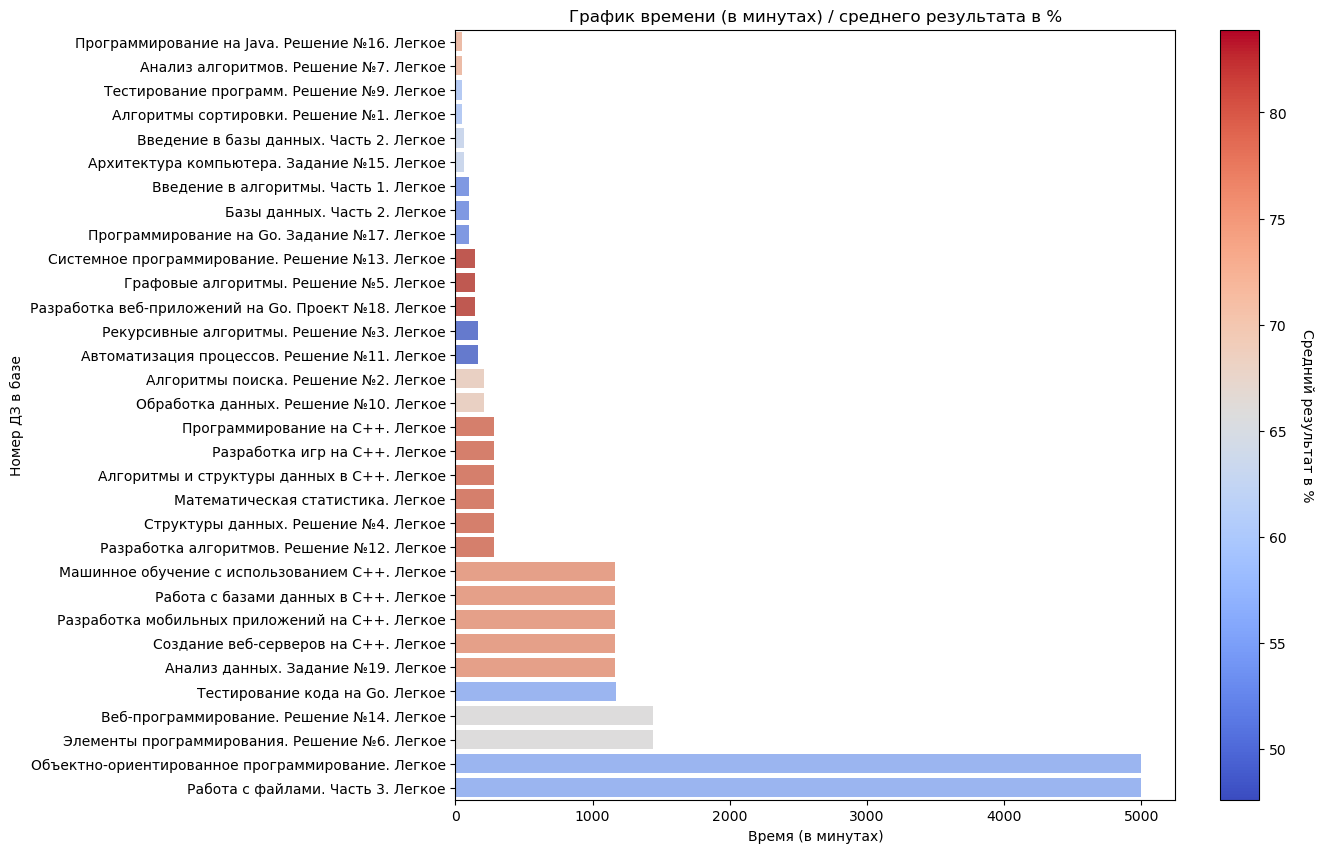

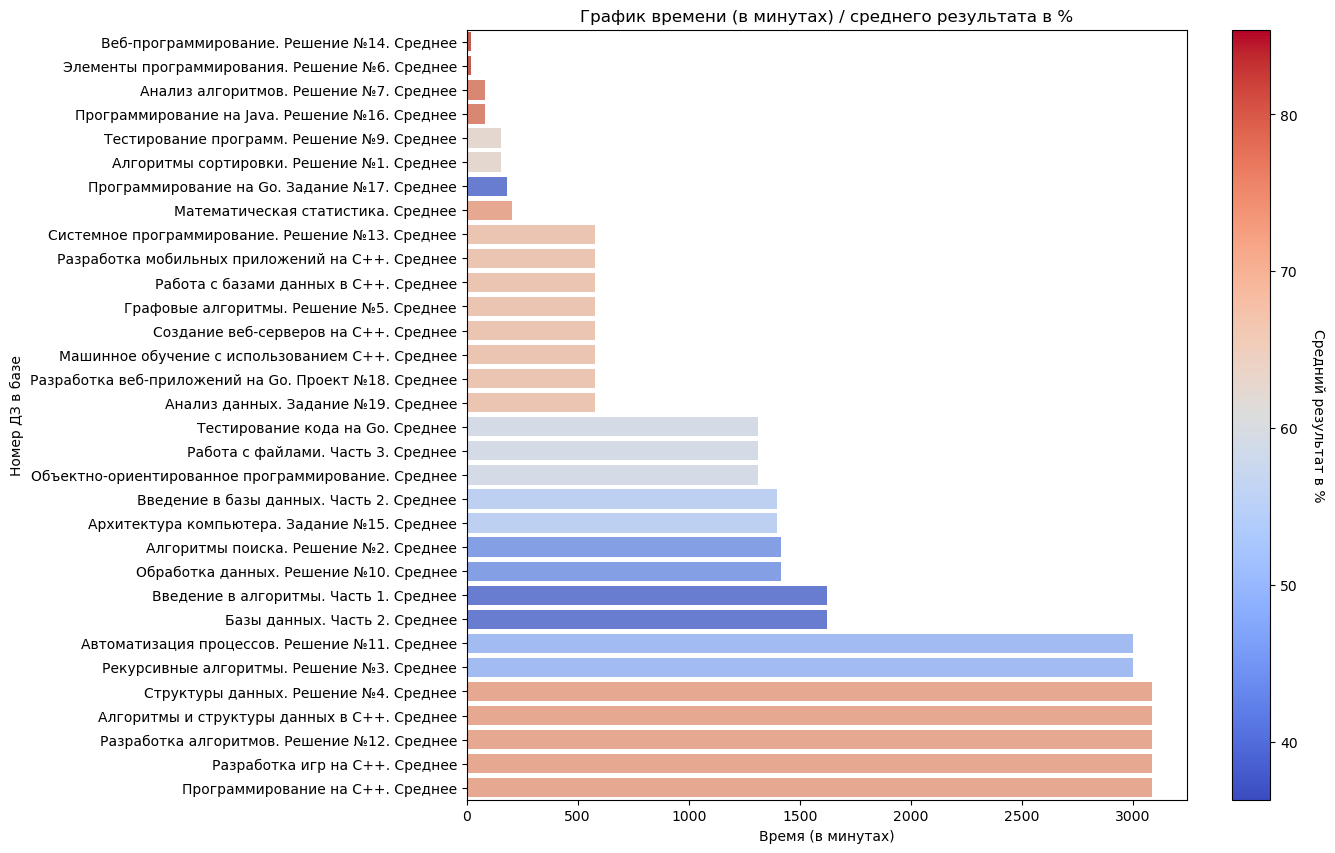

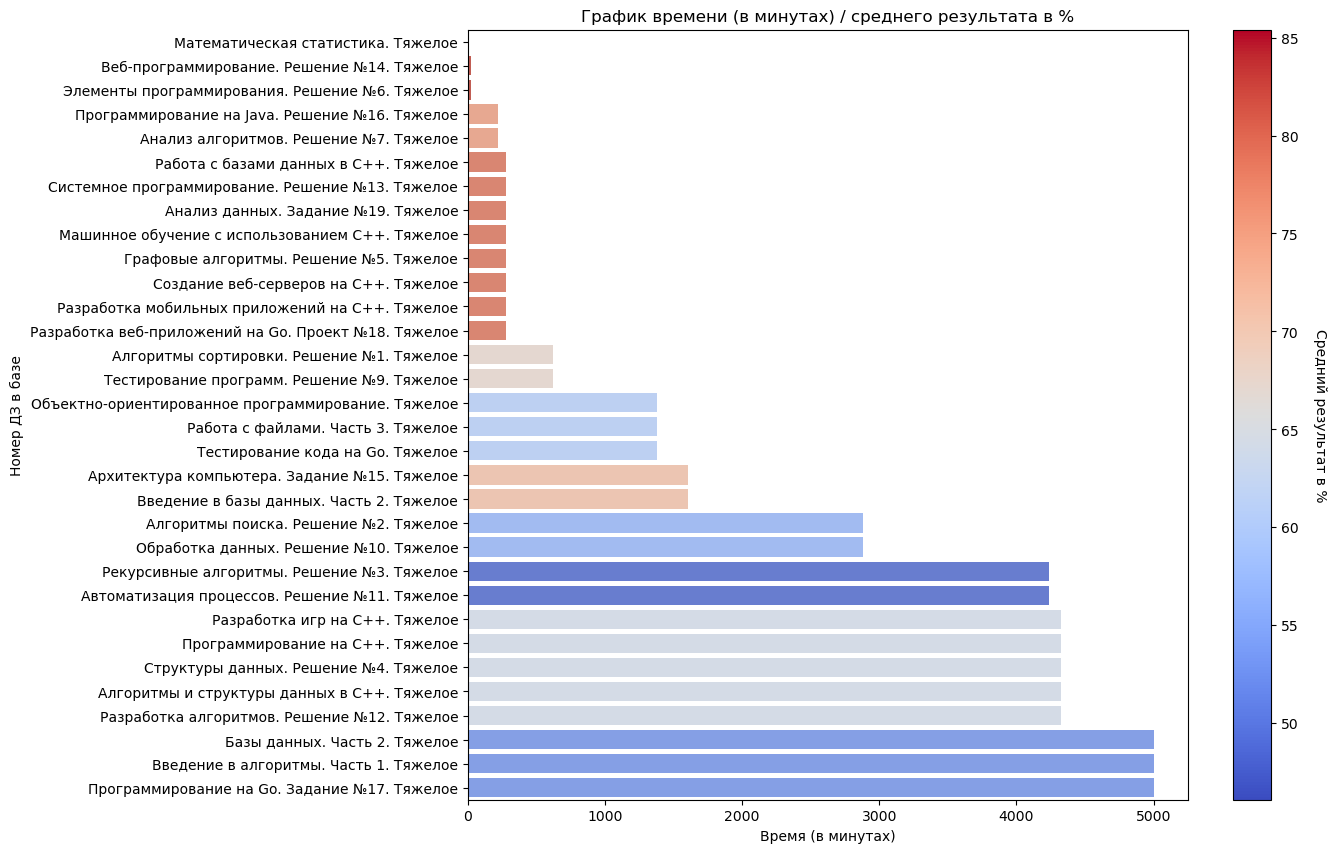

In [66]:
data_sort_copy = data_sort.copy()
data_sort_copy['80 процентиль времени решения ДЗ в минутах'] = data_sort_copy['80 процентиль времени решения ДЗ в минутах'].apply(lambda x: min(x, 5000))
data_sort_copy = data_sort_copy.sort_values(by='80 процентиль времени решения ДЗ в минутах')

def convert_to_numeric(value):
    try:
        return pd.to_numeric(value.replace(',', '.').replace('%', ''), errors='coerce')
    except ValueError:
        return None


for track in ['Легкое', 'Среднее', 'Тяжелое']:
    
    data_track = data_sort_copy[data_sort_copy['ДЗ в базе'].str.contains(track)]
    
    plt.figure(figsize=(18, 10))
    plt.subplots_adjust(left=0.4)

    norm = plt.Normalize(data_track['средний результат в %'].min(), data_track['средний результат в %'].max())
    sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
    
    ax = sns.barplot(x='80 процентиль времени решения ДЗ в минутах', y='ДЗ в базе', data=data_track, palette='coolwarm', hue='средний результат в %', dodge=False)

    unique_legend_values = data_track['средний результат в %'].dropna().unique().astype(int)

    legend = plt.legend(title='Средний результат в %')
    legend_labels = [f'{value}%' for value in unique_legend_values if value.is_integer()]
    legend.get_title().set_fontsize('10') 
    for text in legend.texts:
        text.set_fontsize('8') 

    plt.title('График времени (в минутах) / среднего результата в %')
    plt.xlabel('Время (в минутах)')
    plt.ylabel('Номер ДЗ в базе')

    ax.legend().set_visible(False)
    cbar = ax.figure.colorbar(sm, ax=ax)
    cbar.set_label('Средний результат в %', rotation=270, labelpad=20)

#     plt.savefig(f'output_plot_{track}.png', dpi=300, bbox_inches='tight')

    plt.show()